# Load data

In [15]:
# open .pkl files from local
import pickle

from IPython.core.pylabtools import figsize

with open('train.pkl', 'rb') as file:
    train = pickle.load(file)

with open('test.pkl', 'rb') as file:
    test = pickle.load(file)

In [16]:
# import for traditional machine learning
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
# NLP related import
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [17]:
print(train[0].prompt)

How much does this book cost to the nearest dollar?

Extremely Weird Animal Defenses
Describes the physical characteristics and behavior of a number of animals with unusual means of defense, including the burrfish, the gelada, and the bulldog ant Publisher Rick Steves (April 16, 1997), Language English, Paperback 32 pages, ISBN 10 ISBN 13 Reading age 8 - 12 years, Grade level 3 - 7, Item Weight 4.8 ounces, Dimensions 8.5 x 0.25 x 11.5 inches Categories Books, Science & Math, Biological Sciences Author 'avatar' 'https 'name' 'Sarah Lovett', 'about' 'Discover more of the author’s books, see similar authors, read author blogs and more'

Price is $3.00


In [18]:
print(train[0].price)

3.2


# Random Price guesser

In [19]:
import random

def random_pricer(item):
    return random.randrange(1, 1000)

random.seed(311)

## Setup

In [20]:
import math
import matplotlib.pyplot as plt

# Assuming already loaded 'test' data and set random seed
size = 300
guesses = []
truths = []
errors = []
sles = []
colors = []

# Color codes for terminal output
def color_for(error, truth):
    if error < 40 or error / truth < 0.2:
        return "green"
    elif error < 80 or error / truth < 0.4:
        return "orange"
    else:
        return "red"

In [21]:
# Terminal color codes for output
COLOR_MAP = {
    "green": "\033[92m",
    "orange": "\033[93m",
    "red": "\033[91m",
}
RESET = "\033[0m"

for i in range(size):
    datapoint = test[i]
    guess = random_pricer(datapoint)
    truth = datapoint.price
    error = abs(guess - truth)
    log_error = math.log(truth + 1) - math.log(guess + 1)
    sle = log_error ** 2
    color = color_for(error, truth)
    title = datapoint.title if len(datapoint.title) <= 40 else datapoint.title[:40] + "..."

    guesses.append(guess)
    truths.append(truth)
    errors.append(error)
    sles.append(sle)
    colors.append(color)

    print(f"{COLOR_MAP[color]}{i+1}: Guess: ${guess:,.2f} Truth: ${truth:,.2f} Error: ${error:,.2f} SLE: {sle:,.2f} Item: {title}{RESET}")

1: Guess: $841.00 Truth: $35.50 Error: $805.50 SLE: 9.85 Item: Successful with the Agile Spotify Framew...
2: Guess: $271.00 Truth: $60.00 Error: $211.00 SLE: 2.23 Item: Handbook of Corporate Lending: A Guide f...
3: Guess: $264.00 Truth: $295.09 Error: $31.09 SLE: 0.01 Item: Grandes obras ilustradas de Charles Dick...
4: Guess: $743.00 Truth: $13.00 Error: $730.00 SLE: 15.78 Item: In Spite of the Storm: My Soul is Anchor...
5: Guess: $73.00 Truth: $9.63 Error: $63.37 SLE: 3.77 Item: Jesus Christ Heals
6: Guess: $995.00 Truth: $62.49 Error: $932.51 SLE: 7.58 Item: Romans (Ancient Christian Commentary on ...
7: Guess: $447.00 Truth: $29.97 Error: $417.03 SLE: 7.14 Item: Quality (5th Edition)
8: Guess: $486.00 Truth: $182.87 Error: $303.13 SLE: 0.95 Item: Giant Magnetoresistance (GMR) Sensors: F...
9: Guess: $994.00 Truth: $38.98 Error: $955.02 SLE: 10.33 Item: Secrets of Lighting on Location: A Photo...
10: Guess: $907.00 Truth: $42.80 Error: $864.20 SLE: 9.19 Item: Brand Elevation: Les

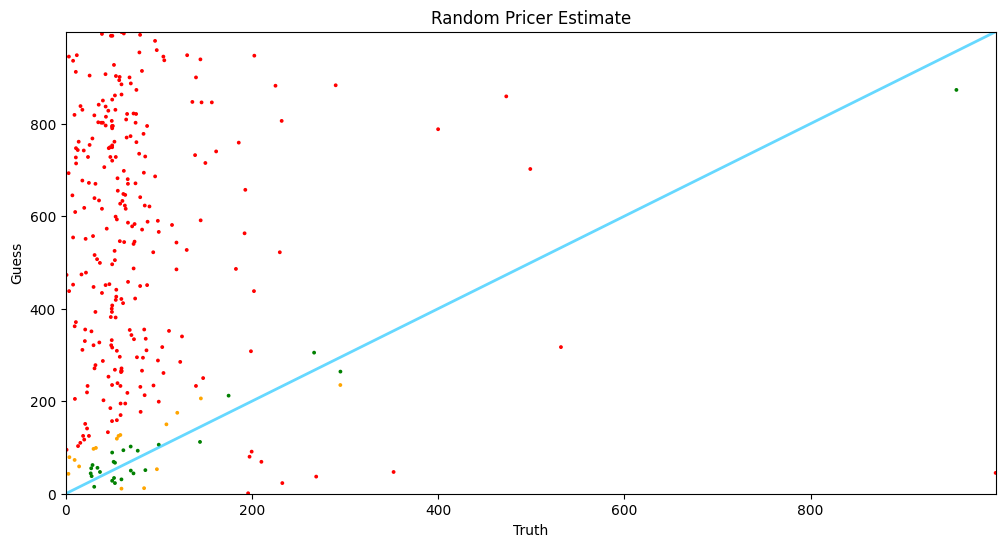

In [22]:
# visualization
max_val = max(max(truths), max(guesses))

plt.figure(figsize=(12, 6))
plt.plot([0, max_val], [0, max_val], color='deepskyblue', lw=2, alpha=0.6)
plt.scatter(truths, guesses, s=3, c=colors)
plt.xlabel("Truth")
plt.ylabel("Guess")
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.title("Random Pricer Estimate")
plt.show()

Biểu đồ cho thấy việc dự đoán ngẫu nhiên giá cả là rất không chính xác

In [23]:
average_error = sum(errors) / size
rmsle = math.sqrt(sum(sles) / size)
hits = sum(1 for c in colors if c == "green")
hit_rate = hits / size * 100

print(f"\nReport for Random Pricer")
print(f"Average Error: ${average_error:,.2f}")
print(f"RMSLE: {rmsle:.2f}")
print(f"Green Hit Rate: {hit_rate:.1f}%")


Report for Random Pricer
Average Error: $434.55
RMSLE: 2.30
Green Hit Rate: 8.7%


In [24]:
class Tester:
    def __init__(self, predictor, title=None, data=test, size=300):
        self.predictor = predictor
        self.data = data
        self.title = title or predictor.__name__.replace("_", " ").title()
        self.size = size
        self.guesses = []
        self.truths = []
        self.errors = []
        self.sles = []
        self.colors = []

    # Color codes for terminal output
    def color_for(self, error, truth):
        if error < 40 or error / truth < 0.2:
            return "green"
        elif error < 80 or error / truth < 0.4:
            return "orange"
        else:
            return "red"

    def run_datapoints(self, i):
        datapoint = self.data[i]
        guess = self.predictor(datapoint)
        truth = datapoint.price
        error = abs(guess - truth)
        log_error = math.log(truth + 1) - math.log(guess + 1)
        sle = log_error ** 2
        color = color_for(error, truth)
        title = datapoint.title if len(datapoint.title) <= 40 else datapoint.title[:40] + "..."

        self.guesses.append(guess)
        self.truths.append(truth)
        self.errors.append(error)
        self.sles.append(sle)
        self.colors.append(color)

        print(f"{COLOR_MAP[color]}{i+1}: Guess: ${guess:,.2f} Truth: ${truth:,.2f} Error: ${error:,.2f} SLE: {sle:,.2f} Item: {title}{RESET}")

    def chart(self, title):
        # visualization
        max_val = max(max(truths), max(guesses))

        plt.figure(figsize=(12, 6))
        plt.plot([0, max_val], [0, max_val], color='deepskyblue', lw=2, alpha=0.6)
        plt.scatter(truths, guesses, s=3, c=colors)
        plt.xlabel("Truth")
        plt.ylabel("Guess")
        plt.xlim(0, max_val)
        plt.ylim(0, max_val)
        plt.title(title)
        plt.show()

    def report(self):
        average_error = sum(self.errors) / self.size
        rmsle = math.sqrt(sum(self.sles) / self.size)
        hits = sum(1 for c in self.colors if c == "green")
        title = f"{self.title} | Avg Error = ${average_error:,.2f} | RMSLE = {rmsle:,.2f} | Hits = {hits / self.size * 100:.1f}%"
        self.chart(title)

    def run(self):
        for i in range(self.size):
            self.run_datapoints(i)
        self.report()

    @classmethod
    def test(cls, function):
        cls(function).run()


1: Guess: $841.00 Truth: $35.50 Error: $805.50 SLE: 9.85 Item: Successful with the Agile Spotify Framew...
2: Guess: $271.00 Truth: $60.00 Error: $211.00 SLE: 2.23 Item: Handbook of Corporate Lending: A Guide f...
3: Guess: $264.00 Truth: $295.09 Error: $31.09 SLE: 0.01 Item: Grandes obras ilustradas de Charles Dick...
4: Guess: $743.00 Truth: $13.00 Error: $730.00 SLE: 15.78 Item: In Spite of the Storm: My Soul is Anchor...
5: Guess: $73.00 Truth: $9.63 Error: $63.37 SLE: 3.77 Item: Jesus Christ Heals
6: Guess: $995.00 Truth: $62.49 Error: $932.51 SLE: 7.58 Item: Romans (Ancient Christian Commentary on ...
7: Guess: $447.00 Truth: $29.97 Error: $417.03 SLE: 7.14 Item: Quality (5th Edition)
8: Guess: $486.00 Truth: $182.87 Error: $303.13 SLE: 0.95 Item: Giant Magnetoresistance (GMR) Sensors: F...
9: Guess: $994.00 Truth: $38.98 Error: $955.02 SLE: 10.33 Item: Secrets of Lighting on Location: A Photo...
10: Guess: $907.00 Truth: $42.80 Error: $864.20 SLE: 9.19 Item: Brand Elevation: Les

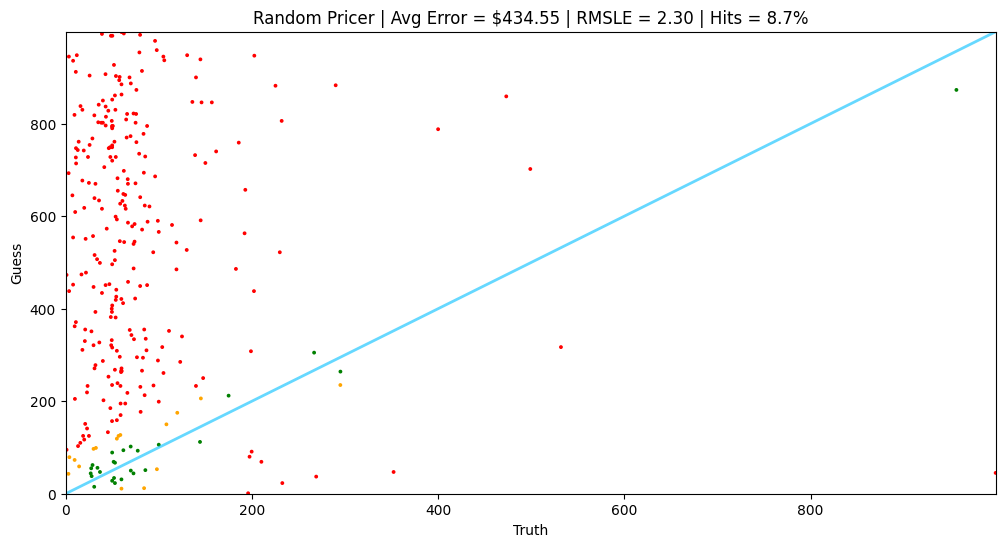

In [25]:
# Run our TestRunner
random.seed(311)
Tester.test(random_pricer)

# Machine Learning

### Feature engineering: tìm và trích xuất những features tốt nhất để dự đoán giá cả

In [26]:
train[0].details

'{"Publisher": "Rick Steves (April 16, 1997)", "Language": "English", "Paperback": "32 pages", "ISBN 10": "1562613588", "ISBN 13": "978-1562613587", "Reading age": "8 - 12 years", "Grade level": "3 - 7", "Item Weight": "4.8 ounces", "Dimensions": "8.5 x 0.25 x 11.5 inches"}'

In [27]:
import json

for item in train:
    item.parsed_details = json.loads(item.details)
for item in test:
    item.parsed_details = json.loads(item.details)

In [28]:
train[100].parsed_details

{'Publisher': 'LWW; Fourteenth, 24 Month edition (July 23, 2019)',
 'Language': 'English',
 'ISBN 10': '1975124464',
 'ISBN 13': '978-1975124465',
 'Item Weight': '3.2 ounces',
 'Dimensions': '5.5 x 0.5 x 7.5 inches'}

In [29]:
train[0].parsed_details.keys()

dict_keys(['Publisher', 'Language', 'Paperback', 'ISBN 10', 'ISBN 13', 'Reading age', 'Grade level', 'Item Weight', 'Dimensions'])

In [30]:
from collections import Counter

parsed_details_count = Counter()
for item in train:
    for f in item.parsed_details.keys():
        parsed_details_count[f] += 1

parsed_details_count.most_common(40)

[('Publisher', 249153),
 ('Language', 249077),
 ('Item Weight', 241182),
 ('ISBN 13', 233333),
 ('ISBN 10', 229277),
 ('Dimensions', 215843),
 ('Paperback', 111716),
 ('Hardcover', 99600),
 ('Reading age', 21940),
 ('Grade level', 13693),
 ('Publication date', 9126),
 ('Lexile measure', 4881),
 ('Product Dimensions', 4846),
 ('Release date', 4698),
 ('Sticky notes', 4324),
 ('File size', 4323),
 ('Enhanced typesetting', 4323),
 ('Text to Speech', 4322),
 ('Word Wise', 4322),
 ('Print length', 4260),
 ('X Ray', 4172),
 ('Screen Reader', 3613),
 ('Mass Market Paperback', 2571),
 ('Spiral bound', 2038),
 ('Country of Origin', 1981),
 ('Loose Leaf', 1505),
 ('Simultaneous device usage', 1351),
 ('Perfect Paperback', 990),
 ('Library Binding', 941),
 ('Is Discontinued By Manufacturer', 803),
 ('Board book', 718),
 ('Audio CD', 638),
 ('Page numbers source ISBN', 626),
 ('Package Dimensions', 616),
 ('Cards', 536),
 ('Printed Access Code', 468),
 ('Leather Bound', 455),
 ('Imitation Leather'

In [31]:
# Item weight
def get_weight(item):
    weight_str = item.parsed_details.get('Item Weight')
    if weight_str:
        parts = weight_str.split(' ')
        amount = float(parts[0])
        unit = parts[1].lower()
        if unit=="pounds":
            return amount
        elif unit=="ounces":
            return amount / 16
        elif unit=="grams":
            return amount / 453.592
        elif unit=="milligrams":
            return amount / 453592
        elif unit=="kilograms":
            return amount / 0.453592
        elif unit=="hundredths" and parts[2].lower()=="pounds":
            return amount / 100
        else:
            print(weight_str)
    return None

In [32]:
weights = [get_weight(t) for t in train]
weights = [w for w in weights if w]

In [33]:
average_weight = sum(weights)/len(weights)
average_weight

1.9004274912415615

In [34]:
## item weight
def get_weight_with_default(item):
    weight = get_weight(item)
    return weight or average_weight

In [35]:
import re

def convert_grade_level(grade_str):
    if not grade_str:
        return None

    grade_str = grade_str.strip().lower()

    if 'kindergarten' in grade_str:
        return 0
    elif 'college' in grade_str:
        return 13  # Or 14, depending on your definition
    elif 'all ages' in grade_str:
        return None  # or a default like 7
    elif 'and up' in grade_str:
        match = re.search(r'\d+', grade_str)
        if match:
            return int(match.group())
    elif '-' in grade_str:
        parts = re.findall(r'\d+', grade_str)
        if len(parts) == 2:
            return (int(parts[0]) + int(parts[1])) / 2
    elif grade_str.isdigit():
        return int(grade_str)

    return None

In [36]:
grades = [convert_grade_level(item.parsed_details.get("Grade level")) for item in train]
grades = [g for g in grades if g is not None]
average_grade = sum(grades) / len(grades)

## grade level
def get_grade_with_default(item):
    grade = convert_grade_level(item.parsed_details.get("Grade level"))
    return int(grade if grade is not None else average_grade)

In [37]:
average_grade

5.428822937625754

In [38]:
## text lenghth
def get_text_length(item):
    return len(item.test_prompt())

In [39]:
## publisher
##### extract publisher name
import re

def get_publisher_name(item):
    raw = item.parsed_details.get("Publisher")
    if not raw:
        return None

    # Remove everything after the first open parenthesis or semicolon
    raw = re.split(r'[\(;]', raw)[0].strip()

    return raw if raw else None

In [40]:
publishers = [get_publisher_name(item) for item in train]
publishers = [p for p in publishers if p]

In [41]:
# investigate the publishers

publishers_count = Counter()
for t in train:
    publisher = t.parsed_details.get("Publisher")
    if publisher:
        publishers_count[publisher]+=1

# Look at most common 40 publishers

publishers_count.most_common(40)

[('Mometrix Media LLC; Flc Crds edition (February 14, 2013)', 186),
 ('Independently published', 175),
 ('Routledge; 1 edition', 137),
 ('Kessinger Publishing, LLC (September 10, 2010)', 133),
 ('CreateSpace Independent Publishing Platform', 121),
 ('Mometrix Media LLC (February 14, 2013)', 97),
 ('Forgotten Books (August 24, 2018)', 94),
 ('Kessinger Publishing, LLC (July 25, 2007)', 53),
 ('Wiley; 1 edition', 44),
 ('CRC Press; 1 edition', 43),
 ('Kessinger Publishing (September 10, 2010)', 43),
 ('Mometrix Media LLC; 1st edition (February 14, 2013)', 43),
 ('Mometrix Media LLC; Study Guide edition (February 14, 2013)', 40),
 ('Marvel Enterprises (January 1, 2010)', 38),
 ('Marvel Enterprises (January 1, 2012)', 38),
 ('Marvel Enterprises (January 1, 2009)', 36),
 ('Kessinger Publishing', 35),
 ('Cambridge University Press; 1 edition', 35),
 ('Oxford University Press', 34),
 ('Cambridge University Press', 34),
 ('Oxford University Press; 1 edition', 33),
 ('Kessinger Publishing, LLC 

In [42]:
from collections import Counter

top_publishers = set([k for k, v in Counter(publishers).items() if v > 20])
## publisher
def clean_publisher(p):
    if not p:
        return 'other'
    p = p.lower().strip()
    return p if p in top_publishers else 'other'

In [43]:
# publication year
def get_publication_year(item):
    pub_date = item.parsed_details.get("Publication date")
    if not pub_date:
        return None

    # Try to extract year using regex
    match = re.search(r'\b(19|20)\d{2}\b', pub_date)
    if match:
        return int(match.group())

    return None

# Compute average year for fallback
pub_years = [get_publication_year(item) for item in train]
pub_years = [y for y in pub_years if y is not None]
average_year = sum(pub_years) / len(pub_years)

def get_publication_year_with_default(item):
    year = get_publication_year(item)
    return int(year if year is not None else average_year)

In [44]:
# print length
import re

def get_print_length(item):
    length_str = item.parsed_details.get("Print length")
    if length_str:
        match = re.search(r'\d+', length_str)
        if match:
            return int(match.group())
    return None

# Compute average for fallback
print_lengths = [get_print_length(item) for item in train]
print_lengths = [pl for pl in print_lengths if pl is not None]
average_print_length = sum(print_lengths) / len(print_lengths)

def get_print_length_with_default(item):
    length = get_print_length(item)
    return int(length if length is not None else average_print_length)

In [45]:
def get_features(item):
    return {
        "weight": get_weight_with_default(item),
        "grade_level": get_grade_with_default(item),
        "text_length": get_text_length(item),
        "publisher": clean_publisher(get_publisher_name(item)),
        "publication_year": get_publication_year_with_default(item),
        "print_length": get_print_length_with_default(item),
    }

In [46]:
# Look at features in a training item
get_features(train[0])

{'weight': 0.3,
 'grade_level': 5,
 'text_length': 652,
 'publisher': 'other',
 'publication_year': 2011,
 'print_length': 449}

In [47]:
# A utility function to convert our features into a pandas dataframe

def list_to_dataframe(items):
    features = [get_features(item) for item in items]
    df = pd.DataFrame(features)
    df['price'] = [item.price for item in items]
    return df

train_df = list_to_dataframe(train)
test_df = list_to_dataframe(test[:300])

In [48]:
train_df.head()

,weight,grade_level,text_length,publisher,publication_year,print_length,price
0,0.300000,5,652,other,2011,449,3.20
1,0.002188,5,788,other,2011,449,53.97
2,1.460000,2,716,other,2011,449,17.99
3,0.881250,5,852,other,2011,449,67.50
4,3.550000,5,972,other,2011,449,57.36


In [49]:
from sklearn.preprocessing import OneHotEncoder

# Create OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit on both train and test to ensure alignment
ohe.fit(pd.concat([train_df[['publisher']], test_df[['publisher']]]))

# Transform train and test
train_encoded = ohe.transform(train_df[['publisher']])
test_encoded = ohe.transform(test_df[['publisher']])

# Get encoded column names
encoded_cols = ohe.get_feature_names_out(['publisher'])

# Convert to DataFrames
train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_cols, index=train_df.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_cols, index=test_df.index)

# Drop original publisher column
train_df = pd.concat([train_df.drop(columns=['publisher']), train_encoded_df], axis=1)
test_df = pd.concat([test_df.drop(columns=['publisher']), test_encoded_df], axis=1)

In [50]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   weight                    300 non-null    float64
 1   grade_level               300 non-null    int64  
 2   text_length               300 non-null    int64  
 3   publication_year          300 non-null    int64  
 4   print_length              300 non-null    int64  
 5   price                     300 non-null    float64
 6   publisher_christianaudio  300 non-null    float64
 7   publisher_generic         300 non-null    float64
 8   publisher_gestalten       300 non-null    float64
 9   publisher_lulu.com        300 non-null    float64
 10  publisher_other           300 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 25.9 KB


### Linear Regression

In [51]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(311)

# Separate features and target
feature_columns = [col for col in train_df.columns if col != 'price']
X_train = train_df[feature_columns]
y_train = train_df['price']
X_test = test_df[feature_columns]
y_test = test_df['price']

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients
print("Feature coefficients:")
for feature, coef in zip(feature_columns, model.coef_):
    print(f"\t{feature}: {coef:.4f}")
print(f"\nIntercept: {model.intercept_:.4f}")

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")


Feature coefficients:
	weight: 0.2046
	grade_level: 0.8954
	text_length: 0.0312
	publication_year: -2.1081
	print_length: 0.0127
	publisher_christianaudio: 12.3928
	publisher_generic: 5.1282
	publisher_gestalten: 4.3933
	publisher_lulu.com: -20.8442
	publisher_other: -1.0701

Intercept: 4283.1280
MSE: 10805.2599
R2: -0.0067


In [52]:
def linear_regression_pricer(item):
    # get fearture dictionary
    fearture_dict = get_features(item)

    # Convert to df (single row)
    features_df = pd.DataFrame([fearture_dict])

    # Apply one-hot encoding for publisher
    publisher_encoded = ohe.transform(features_df[['publisher']])
    publisher_encoded_df = pd.DataFrame(publisher_encoded, columns=encoded_cols)

    # Drop original publisher col and add encoded_cols
    features_df = pd.concat([features_df.drop(columns=['publisher']), publisher_encoded_df], axis=1)

    # Ensure all feature columns from the model are present
    for col in feature_columns:
        if col not in feature_columns:
            features_df[col] = 0

    # Select only columns used by the model
    features_df = features_df[feature_columns]

    # predict price
    return model.predict(features_df)[0]

1: Guess: $79.80 Truth: $35.50 Error: $44.30 SLE: 0.63 Item: Successful with the Agile Spotify Framew...
2: Guess: $80.00 Truth: $60.00 Error: $20.00 SLE: 0.08 Item: Handbook of Corporate Lending: A Guide f...
3: Guess: $74.17 Truth: $295.09 Error: $220.92 SLE: 1.88 Item: Grandes obras ilustradas de Charles Dick...
4: Guess: $76.08 Truth: $13.00 Error: $63.08 SLE: 2.91 Item: In Spite of the Storm: My Soul is Anchor...
5: Guess: $76.32 Truth: $9.63 Error: $66.69 SLE: 3.94 Item: Jesus Christ Heals
6: Guess: $95.29 Truth: $62.49 Error: $32.80 SLE: 0.17 Item: Romans (Ancient Christian Commentary on ...
7: Guess: $83.61 Truth: $29.97 Error: $53.64 SLE: 1.01 Item: Quality (5th Edition)
8: Guess: $80.92 Truth: $182.87 Error: $101.95 SLE: 0.65 Item: Giant Magnetoresistance (GMR) Sensors: F...
9: Guess: $82.83 Truth: $38.98 Error: $43.85 SLE: 0.55 Item: Secrets of Lighting on Location: A Photo...
10: Guess: $78.00 Truth: $42.80 Error: $35.20 SLE: 0.35 Item: Brand Elevation: Lessons in Ueber-Bra

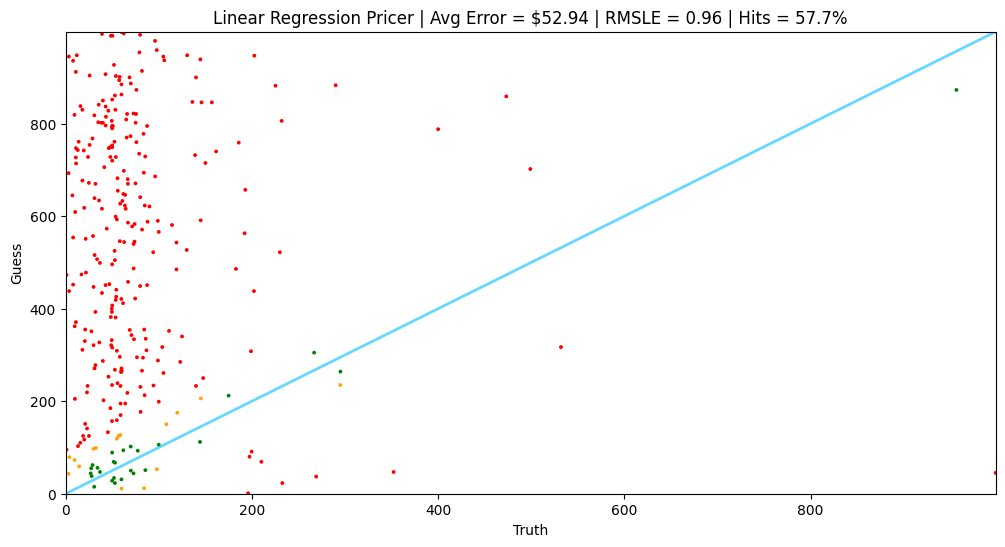

In [53]:
random.seed(311)
Tester.test(linear_regression_pricer)

### Decision Tree Regression

In [54]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(311)

# Separate features and target
feature_columns = [col for col in train_df.columns if col != 'price']
X_train = train_df[feature_columns]
y_train = train_df['price']
X_test = test_df[feature_columns]
y_test = test_df['price']

# Train Linear Regression
model_DTR = DecisionTreeRegressor()
model_DTR.fit(X_train, y_train)

# Print importances
print("Feature's importances:")
for feature, importance in zip(feature_columns, model_DTR.feature_importances_):
    print(f"\t{feature}: {importance:.4f}")

# Predict and evaluate
y_pred = model_DTR.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")


Feature's importances:
	weight: 0.4336
	grade_level: 0.0278
	text_length: 0.5097
	publication_year: 0.0144
	print_length: 0.0121
	publisher_christianaudio: 0.0000
	publisher_generic: 0.0001
	publisher_gestalten: 0.0002
	publisher_lulu.com: 0.0008
	publisher_other: 0.0014
MSE: 16086.6423
R2: -0.4987


In [55]:
def decision_tree_regression_pricer(item):
    # get fearture dictionary
    fearture_dict = get_features(item)

    # Convert to df (single row)
    features_df = pd.DataFrame([fearture_dict])

    # Apply one-hot encoding for publisher
    publisher_encoded = ohe.transform(features_df[['publisher']])
    publisher_encoded_df = pd.DataFrame(publisher_encoded, columns=encoded_cols)

    # Drop original publisher col and add encoded_cols
    features_df = pd.concat([features_df.drop(columns=['publisher']), publisher_encoded_df], axis=1)

    # Ensure all feature columns from the model are present
    for col in feature_columns:
        if col not in feature_columns:
            features_df[col] = 0

    # Select only columns used by the model
    features_df = features_df[feature_columns]

    # predict price
    return model_DTR.predict(features_df)[0]

1: Guess: $34.94 Truth: $35.50 Error: $0.56 SLE: 0.00 Item: Successful with the Agile Spotify Framew...
2: Guess: $63.17 Truth: $60.00 Error: $3.17 SLE: 0.00 Item: Handbook of Corporate Lending: A Guide f...
3: Guess: $50.76 Truth: $295.09 Error: $244.33 SLE: 3.04 Item: Grandes obras ilustradas de Charles Dick...
4: Guess: $43.45 Truth: $13.00 Error: $30.45 SLE: 1.33 Item: In Spite of the Storm: My Soul is Anchor...
5: Guess: $82.22 Truth: $9.63 Error: $72.59 SLE: 4.23 Item: Jesus Christ Heals
6: Guess: $499.99 Truth: $62.49 Error: $437.50 SLE: 4.27 Item: Romans (Ancient Christian Commentary on ...
7: Guess: $79.17 Truth: $29.97 Error: $49.20 SLE: 0.90 Item: Quality (5th Edition)
8: Guess: $53.43 Truth: $182.87 Error: $129.44 SLE: 1.48 Item: Giant Magnetoresistance (GMR) Sensors: F...
9: Guess: $52.66 Truth: $38.98 Error: $13.68 SLE: 0.09 Item: Secrets of Lighting on Location: A Photo...
10: Guess: $64.18 Truth: $42.80 Error: $21.38 SLE: 0.16 Item: Brand Elevation: Lessons in Ueber-Bra

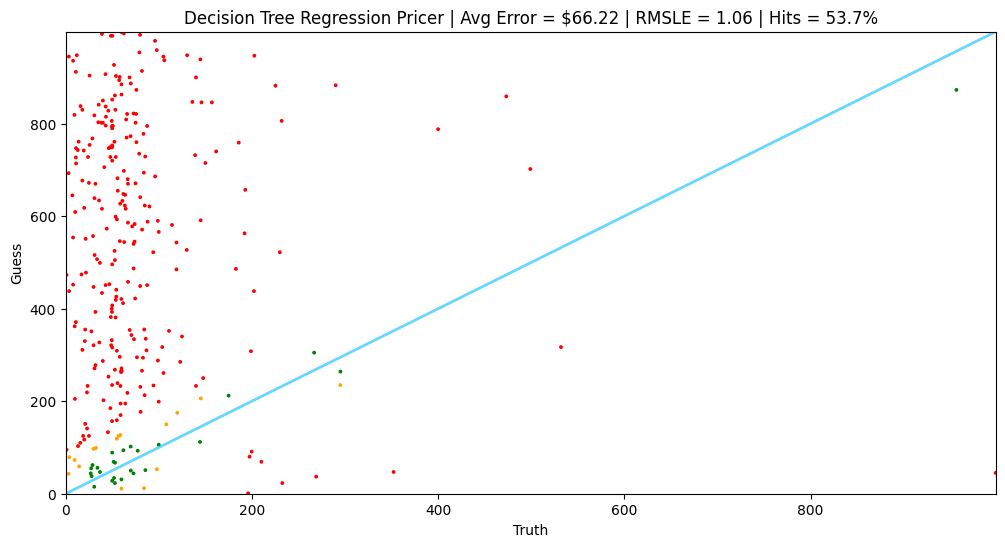

In [56]:
random.seed(311)
Tester.test(decision_tree_regression_pricer)

### Random Forest Regression

In [57]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(311)

# Separate features and target
feature_columns = [col for col in train_df.columns if col != 'price']
X_train = train_df[feature_columns]
y_train = train_df['price']
X_test = test_df[feature_columns]
y_test = test_df['price']

# Train Linear Regression
model_RFR = RandomForestRegressor()
model_RFR.fit(X_train, y_train)

# Print importances
print("Feature's importances:")
for feature, importance in zip(feature_columns, model_RFR.feature_importances_):
    print(f"\t{feature}: {importance:.4f}")

# Predict and evaluate
y_pred = model_RFR.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

Feature's importances:
	weight: 0.4458
	grade_level: 0.0262
	text_length: 0.5026
	publication_year: 0.0126
	print_length: 0.0105
	publisher_christianaudio: 0.0001
	publisher_generic: 0.0003
	publisher_gestalten: 0.0002
	publisher_lulu.com: 0.0007
	publisher_other: 0.0011
MSE: 11732.3263
R2: -0.0931


In [58]:
def random_forest_regression_pricer(item):
    # get fearture dictionary
    fearture_dict = get_features(item)

    # Convert to df (single row)
    features_df = pd.DataFrame([fearture_dict])

    # Apply one-hot encoding for publisher
    publisher_encoded = ohe.transform(features_df[['publisher']])
    publisher_encoded_df = pd.DataFrame(publisher_encoded, columns=encoded_cols)

    # Drop original publisher col and add encoded_cols
    features_df = pd.concat([features_df.drop(columns=['publisher']), publisher_encoded_df], axis=1)

    # Ensure all feature columns from the model are present
    for col in feature_columns:
        if col not in feature_columns:
            features_df[col] = 0

    # Select only columns used by the model
    features_df = features_df[feature_columns]

    # predict price
    return model_RFR.predict(features_df)[0]

1: Guess: $58.86 Truth: $35.50 Error: $23.36 SLE: 0.24 Item: Successful with the Agile Spotify Framew...
2: Guess: $63.61 Truth: $60.00 Error: $3.61 SLE: 0.00 Item: Handbook of Corporate Lending: A Guide f...
3: Guess: $60.63 Truth: $295.09 Error: $234.46 SLE: 2.46 Item: Grandes obras ilustradas de Charles Dick...
4: Guess: $44.71 Truth: $13.00 Error: $31.71 SLE: 1.40 Item: In Spite of the Storm: My Soul is Anchor...
5: Guess: $71.44 Truth: $9.63 Error: $61.81 SLE: 3.68 Item: Jesus Christ Heals
6: Guess: $335.40 Truth: $62.49 Error: $272.91 SLE: 2.78 Item: Romans (Ancient Christian Commentary on ...
7: Guess: $85.05 Truth: $29.97 Error: $55.08 SLE: 1.04 Item: Quality (5th Edition)
8: Guess: $128.19 Truth: $182.87 Error: $54.68 SLE: 0.12 Item: Giant Magnetoresistance (GMR) Sensors: F...
9: Guess: $56.49 Truth: $38.98 Error: $17.51 SLE: 0.13 Item: Secrets of Lighting on Location: A Photo...
10: Guess: $53.23 Truth: $42.80 Error: $10.43 SLE: 0.05 Item: Brand Elevation: Lessons in Ueber-Br

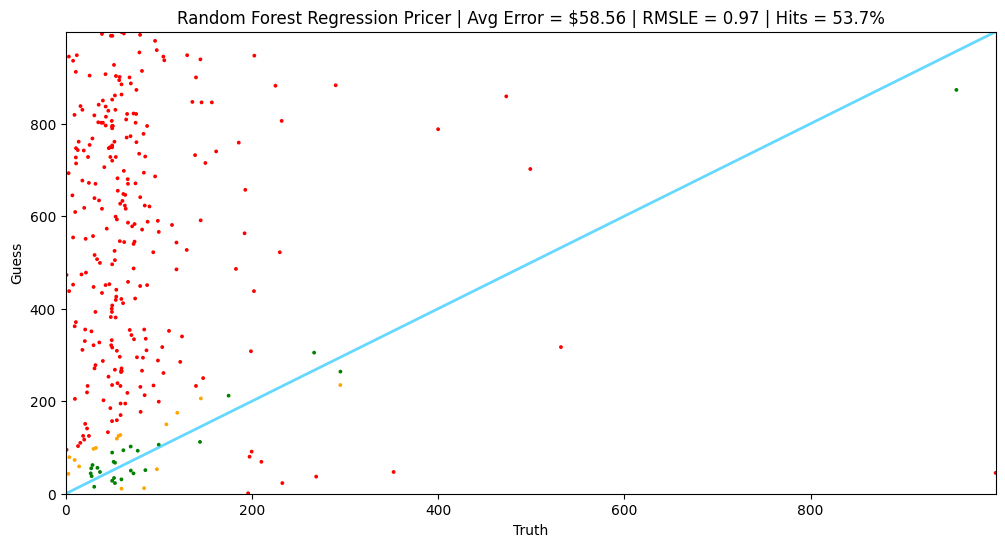

In [59]:
random.seed(311)
Tester.test(random_forest_regression_pricer)

# NLP

In [60]:
prices = np.array([float(item.price) for item in train])
documents = [item.test_prompt() for item in train]

In [61]:
documents[0]

"How much does this book cost to the nearest dollar?\n\nExtremely Weird Animal Defenses\nDescribes the physical characteristics and behavior of a number of animals with unusual means of defense, including the burrfish, the gelada, and the bulldog ant Publisher Rick Steves (April 16, 1997), Language English, Paperback 32 pages, ISBN 10 ISBN 13 Reading age 8 - 12 years, Grade level 3 - 7, Item Weight 4.8 ounces, Dimensions 8.5 x 0.25 x 11.5 inches Categories Books, Science & Math, Biological Sciences Author 'avatar' 'https 'name' 'Sarah Lovett', 'about' 'Discover more of the author’s books, see similar authors, read author blogs and more'\n\nPrice is $"

In [62]:
np.random.seed(311)
# Preprocess the documents for Word2Vec
processed_docs = [simple_preprocess(doc) for doc in documents]

# Train the Word2Vec model
model_w2v = Word2Vec(sentences=processed_docs, vector_size=400, window=5, min_count=1, workers=8)

In [63]:
def document_vector(doc):
    doc_words = simple_preprocess(doc)
    word_vectors = [model_w2v.wv[word] for word in doc_words if word in model_w2v.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model_w2v.vector_size)

X_w2v = np.array([document_vector(doc) for doc in documents])


1: Guess: $69.18 Truth: $35.50 Error: $33.68 SLE: 0.43 Item: Successful with the Agile Spotify Framew...
2: Guess: $91.04 Truth: $60.00 Error: $31.04 SLE: 0.17 Item: Handbook of Corporate Lending: A Guide f...
3: Guess: $94.82 Truth: $295.09 Error: $200.27 SLE: 1.27 Item: Grandes obras ilustradas de Charles Dick...
4: Guess: $60.44 Truth: $13.00 Error: $47.44 SLE: 2.19 Item: In Spite of the Storm: My Soul is Anchor...
5: Guess: $67.58 Truth: $9.63 Error: $57.95 SLE: 3.48 Item: Jesus Christ Heals
6: Guess: $79.55 Truth: $62.49 Error: $17.06 SLE: 0.06 Item: Romans (Ancient Christian Commentary on ...
7: Guess: $102.62 Truth: $29.97 Error: $72.65 SLE: 1.46 Item: Quality (5th Edition)
8: Guess: $99.94 Truth: $182.87 Error: $82.93 SLE: 0.36 Item: Giant Magnetoresistance (GMR) Sensors: F...
9: Guess: $96.46 Truth: $38.98 Error: $57.48 SLE: 0.79 Item: Secrets of Lighting on Location: A Photo...
10: Guess: $60.77 Truth: $42.80 Error: $17.97 SLE: 0.12 Item: Brand Elevation: Lessons in Ueber-Bra

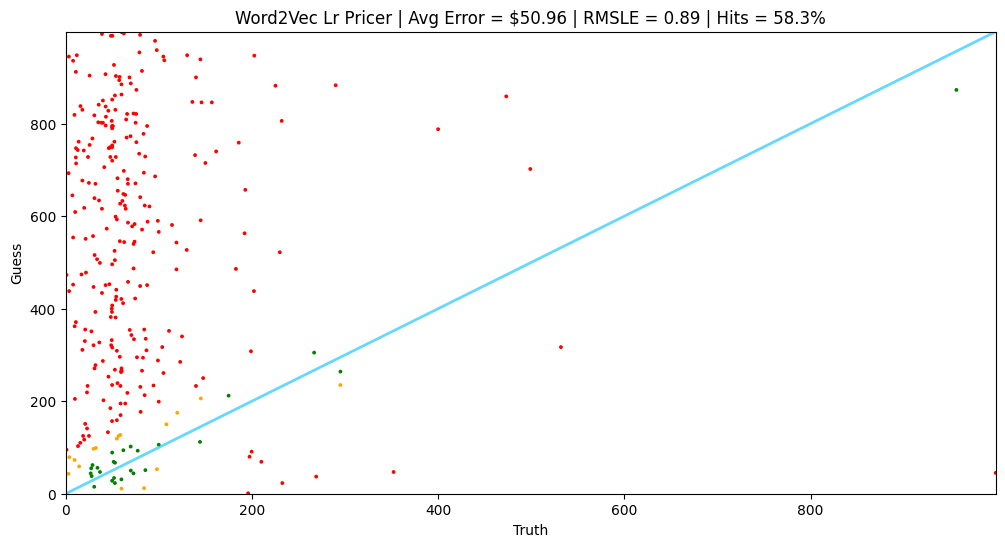

In [64]:
# Run Linear Regression on word2vec, implementing gensim nlp

word2vec_lr_regressor = LinearRegression()
word2vec_lr_regressor.fit(X_w2v, prices)
def word2vec_lr_pricer(item):
    doc = item.test_prompt()
    doc_vector = document_vector(doc)
    return max(0, word2vec_lr_regressor.predict([doc_vector])[0])
Tester.test(word2vec_lr_pricer)